## **Análise de Sentimentos usando Machine Learning**

* Criando modelos para análise de sentimentos de tweets
* Teste com Modelo usando tag de negações
* Teste com Modelo usando Bigrams

In [5]:
from nltk import word_tokenize
import nltk
import re
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.model_selection import cross_val_predict

Ler arquivo de dados e contar a quantidade de linhas

In [6]:
dataset = pd.read_csv(r"C:\Users\marcf\OneDrive\Documentos\Ciencia de dados\materiais-de-apoio-pandas - Curso Edu\Materiais-de-apoio-Pre-processamento-de-Dados\materiais_de_apoio\Tweets_Mg.csv", encoding='utf-8')

In [7]:
dataset.head()

,Unnamed: 0,Created At,Text,Geo Coordinates.latitude,Geo Coordinates.longitude,User Location,Username,User Screen Name,Retweet Count,Classificacao,...,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24
0,0,Sun Jan 08 01:22:05 +0000 2017,���⛪ @ Catedral de Santo Antônio - Governador ...,NaN,NaN,Brasil,Leonardo C Schneider,LeoCSchneider,0,Neutro,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,Sun Jan 08 01:49:01 +0000 2017,"� @ Governador Valadares, Minas Gerais https:/...",-41.9333,-18.85,NaN,Wândell,klefnews,0,Neutro,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,Sun Jan 08 01:01:46 +0000 2017,"�� @ Governador Valadares, Minas Gerais https:...",-41.9333,-18.85,NaN,Wândell,klefnews,0,Neutro,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,Wed Jan 04 21:43:51 +0000 2017,��� https://t.co/BnDsO34qK0,NaN,NaN,NaN,Ana estudando,estudandoconcur,0,Neutro,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,Mon Jan 09 15:08:21 +0000 2017,��� PSOL vai questionar aumento de vereadores ...,NaN,NaN,NaN,Emily,Milly777,0,Negativo,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Exibe as primeiras 50 linhas de tweets

In [8]:
dataset.Text.head(50)

0     ���⛪ @ Catedral de Santo Antônio - Governador ...
1     � @ Governador Valadares, Minas Gerais https:/...
2     �� @ Governador Valadares, Minas Gerais https:...
3                           ��� https://t.co/BnDsO34qK0
4     ��� PSOL vai questionar aumento de vereadores ...
5     " bom é bandido morto"\nDeputado Cabo Júlio é ...
6     "..E 25% dos mineiros dizem não torcer para ti...
7     "A gigantesca barba do mal" em destaque no cad...
8     "BB e governo de Minas travam disputa sobre de...
9     "com vcs bh fica pequena!" Belo Horizonte (pro...
10    "Daí a gente visita governador valadares"\n"Qu...
11    "É bonita e é bonita..." \n#latergram #ibituru...
12    "erro desconhecido" é mato! Aliás, é da secret...
13    "La La Land: Cantando Estações" arrasa no Glob...
14    "La La Land: Cantando Estações" arrasa no Glob...
15    "Los abusos, aun en el estado más sólido, son ...
16    "Mesmo sem muito dinheiro no caixa o governo d...
17    "Modelo de segurança será o nosso legado",

Conta a quantidade de tweets neutros, positivos e negativos

In [9]:
dataset[dataset.Classificacao=='Neutro'].count()

Unnamed: 0                   2453
Created At                   2453
Text                         2453
Geo Coordinates.latitude      102
Geo Coordinates.longitude     102
User Location                1712
Username                     2453
User Screen Name             2453
Retweet Count                2453
Classificacao                2453
Observação                      0
Unnamed: 10                     0
Unnamed: 11                     0
Unnamed: 12                     0
Unnamed: 13                     0
Unnamed: 14                     0
Unnamed: 15                     0
Unnamed: 16                     0
Unnamed: 17                     0
Unnamed: 18                     0
Unnamed: 19                     0
Unnamed: 20                     0
Unnamed: 21                     0
Unnamed: 22                     0
Unnamed: 23                     0
Unnamed: 24                     0
dtype: int64

In [10]:
dataset[dataset.Classificacao=='Positivo'].count()

Unnamed: 0                   3300
Created At                   3300
Text                         3300
Geo Coordinates.latitude        1
Geo Coordinates.longitude       1
User Location                2118
Username                     3300
User Screen Name             3300
Retweet Count                3300
Classificacao                3300
Observação                      1
Unnamed: 10                     0
Unnamed: 11                     0
Unnamed: 12                     0
Unnamed: 13                     0
Unnamed: 14                     0
Unnamed: 15                     0
Unnamed: 16                     0
Unnamed: 17                     0
Unnamed: 18                     0
Unnamed: 19                     0
Unnamed: 20                     0
Unnamed: 21                     0
Unnamed: 22                     0
Unnamed: 23                     0
Unnamed: 24                     0
dtype: int64

In [11]:
dataset[dataset.Classificacao=='Negativo'].count()

Unnamed: 0                   2446
Created At                   2446
Text                         2446
Geo Coordinates.latitude        1
Geo Coordinates.longitude       1
User Location                1659
Username                     2446
User Screen Name             2446
Retweet Count                2446
Classificacao                2446
Observação                      0
Unnamed: 10                     0
Unnamed: 11                     0
Unnamed: 12                     0
Unnamed: 13                     0
Unnamed: 14                     0
Unnamed: 15                     0
Unnamed: 16                     0
Unnamed: 17                     0
Unnamed: 18                     0
Unnamed: 19                     0
Unnamed: 20                     0
Unnamed: 21                     0
Unnamed: 22                     0
Unnamed: 23                     0
Unnamed: 24                     0
dtype: int64

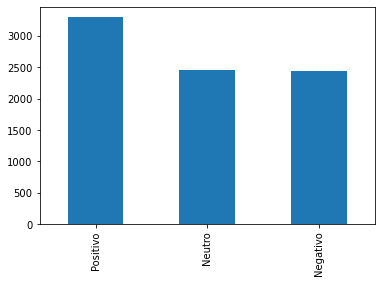

In [12]:
%matplotlib inline
dataset.Classificacao.value_counts().plot(kind='bar');

In [13]:
dataset.count()

Unnamed: 0                   8199
Created At                   8199
Text                         8199
Geo Coordinates.latitude      104
Geo Coordinates.longitude     104
User Location                5489
Username                     8199
User Screen Name             8199
Retweet Count                8199
Classificacao                8199
Observação                      1
Unnamed: 10                     0
Unnamed: 11                     0
Unnamed: 12                     0
Unnamed: 13                     0
Unnamed: 14                     0
Unnamed: 15                     0
Unnamed: 16                     0
Unnamed: 17                     0
Unnamed: 18                     0
Unnamed: 19                     0
Unnamed: 20                     0
Unnamed: 21                     0
Unnamed: 22                     0
Unnamed: 23                     0
Unnamed: 24                     0
dtype: int64

## Pre-Processamento dos Dados

* Remove linhas duplicadas na base de dados
    - Problema na coleta dos dados.
* Remove Stopwords
* Faz Stemming nos dados
* Remove caracteres indesejados como links, pontuação etc.

In [14]:
dataset.drop_duplicates(['Text'],inplace=True)

In [15]:
dataset.Text.count()

5765

## Separando tweets e suas classes

In [16]:
dataset.Classificacao.head(50)

0       Neutro
1       Neutro
2       Neutro
3       Neutro
4     Negativo
5       Neutro
6       Neutro
7       Neutro
8     Negativo
9       Neutro
10      Neutro
11      Neutro
12    Negativo
13      Neutro
14      Neutro
15      Neutro
16    Negativo
17      Neutro
18      Neutro
19      Neutro
20      Neutro
21      Neutro
22      Neutro
23      Neutro
24      Neutro
25    Negativo
26      Neutro
27      Neutro
28      Neutro
29    Negativo
30      Neutro
31      Neutro
32      Neutro
33      Neutro
34      Neutro
35      Neutro
36      Neutro
37      Neutro
38      Neutro
39      Neutro
40      Neutro
41      Neutro
42      Neutro
43    Negativo
44      Neutro
45      Neutro
46      Neutro
47      Neutro
48      Neutro
49      Neutro
Name: Classificacao, dtype: object

In [17]:
tweets = dataset['Text']

In [18]:
classes = dataset['Classificacao']

instalando bibliotecas e baixando as bases de dados

In [19]:
nltk.download('stopwords')
nltk.download('rslp')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\marcf\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package rslp to
[nltk_data]     C:\Users\marcf\AppData\Roaming\nltk_data...
[nltk_data]   Package rslp is already up-to-date!


True

Funões de pre-processamento de dados

In [20]:
def RemoveStopWords(instancia):
    stopwords = set(nltk.corpus.stopwords.words('portuguese'))
    palavras = [i for i in instancia.split() if not i in stopwords]
    return(" ".join(palavras))

In [21]:
def Stemming(instancia):
    stemmer = nltk.stem.RSLPStemmer()
    palavras=[]
    for w in instancia.split():
        palavras.append(stemmer.stem(w))
    return(" ".join(palavras))

In [22]:
def Limpeza_dados(instancia):
    # remove links, pontos, vírgulas, pontos e vírgulas dos tweets
    instancia = re.sub(r"http\S+","",instancia).lower().replace('.','').replace(';','').replace('-','').replace(':','').replace(')','')
    return(instancia)

**Como funciona cada função**

In [23]:
RemoveStopWords('Eu não gosto do partido, e também não votaria novamente nesse governante!')

'Eu gosto partido, votaria novamente nesse governante!'

In [24]:
Stemming('Eu não gosto do partido, e também não votaria novamente nesse governante!')

'eu não gost do partido, e também não vot nov ness governante!'

In [25]:
Limpeza_dados('Assita aqui o video do Governador falando sobre a CEMIG https://www.uol.com.br :) ;)')

'assita aqui o video do governador falando sobre a cemig   '

**Aplica as 3 funções de Pre-processamento nos dados**

In [26]:
def Preprocessing(instancia):
    stemmer = nltk.stem.RSLPStemmer()
    instancia = re.sub(r"http\S+", "", instancia).lower().replace('.','').replace(';','').replace('-','').replace(':','').replace(')','')
    stopwords = set(nltk.corpus.stopwords.words('portuguese'))
    palavras = [stemmer.stem(i) for i in instancia.split() if not i in stopwords]
    return (" ".join(palavras))

# Aplica a função em todos os dados:
tweets = [Preprocessing(i) for i in tweets]

In [27]:
Preprocessing('Eu não gosto do partido, e também não votaria novamente nesse governante. Assita o video aqui https:// :)')

'gost partido, vot nov ness govern assit vide aqu'

Como ficou o preprocessamento

In [28]:
tweets[:50]

['���⛪ @ catedr sant antôni govern valadares/mg',
 '� @ govern valadares, min geral',
 '�� @ govern valadares, min geral',
 '���',
 '��� psol vai quest aument vere prefeit bh justiç poli est min',
 '" bom band morto" deput cab júli conden fic ineleg 10 ano poli est min',
 '"e 25% min diz torc tim nenhum,mesm dentr est atléticomg cruz pq?"',
 '"a gigantesc barb mal" destaqu cadern cult est min',
 '"bb govern min tr disput sobr depósit judiciais"',
 '"com vc bh fic pequena!" bel horizont (pron [bɛloɾiˈzõntʃi][10] capit est mg, áre aproximad 331 km²',
 '"daí gent visit govern valadares" "qu lug eh mãe?" "mg, gent um parent la" man ond q parent',
 '"é bonit bonita" #latergr #ibiturun #hom @ govern valadares, min geral',
 '"err desconhecido" mato! aliás, secret estad fazend tá assim mg precis dinh não, governador?',
 '"la la land cant estações" arras glob our est min',
 '"la la land cant estações" arras glob our est min',
 '"lo abusos, aun en el est má sólido, son min sord tard tempr estall

## Criando o modelo de Machine Learning
**Instancia o objeto que faz a vetorização dos dados de texto**

In [29]:
vectorizer = CountVectorizer(analyzer='word')

**Aplica o vetorizador nos dados de texto**

In [30]:
freq_tweets = vectorizer.fit_transform(tweets)
type(freq_tweets)

scipy.sparse.csr.csr_matrix

In [31]:
modelo = MultinomialNB()
modelo.fit(freq_tweets,classes)

MultinomialNB()

Formato (Linhas, Colunas) da Matriz

In [32]:
freq_tweets.shape

(5765, 5903)

Matriz

In [33]:
freq_tweets.A

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

Cria um modelo com algumas instâncias simples

In [34]:
# Defina instâncias de teste dentro de uma lista
testes = ['Esse governo está no início, vamos ver o que vai dar',
          'Estou muito feliz com o governo de Minas esse ano',
          'O estado de Minas Gerais decretou calamidade financeira!!!',
          'A segurança desse país está deixando a desejar',
          'O governador de Minas é mais uma vez do PT']

In [35]:
testes

['Esse governo está no início, vamos ver o que vai dar',
 'Estou muito feliz com o governo de Minas esse ano',
 'O estado de Minas Gerais decretou calamidade financeira!!!',
 'A segurança desse país está deixando a desejar',
 'O governador de Minas é mais uma vez do PT']

**Aplica a função de Pré-processamento nos dados**

In [36]:
testes = [Preprocessing(i) for i in testes]

In [37]:
# Transforma os dados de teste em vetores de palavras
freq_testes = vectorizer.transform(testes)

In [38]:
# Fazendo a classificação com o modelo treinado.
for t,c in zip(testes, modelo.predict(freq_testes)):
    print(t+", "+c)

govern início, vam ver vai dar, Neutro
feliz govern min ano, Neutro
est min geral decret calam financeira!!!, Negativo
seguranç dess país deix desej, Neutro
govern min vez pt, Negativo


In [39]:
#Probabilidade de cada classe
print(modelo.classes_)
modelo.predict_proba(freq_testes).round(2)

['Negativo' 'Neutro' 'Positivo']


array([[0.12, 0.88, 0.  ],
       [0.02, 0.96, 0.02],
       [1.  , 0.  , 0.  ],
       [0.01, 0.98, 0.01],
       [0.67, 0.32, 0.  ]])

## **Função de Tags de Negações**

* Acrescenta uma tag _NEG encontrada após um 'não'.
* Objetivo é dar mais peso para o modelo identificar uma inversão de sentimento da frase.
* Exemplos: 
    - Eu gosto de cachorros, positivo.
    - Eu **não** gosto de cachorros, negativo.

In [40]:
def marque_negacao(texto):
    negacoes = ['não', 'not']
    negacao_detectada = False
    resultado = []
    palavras = texto.split()
    for p in palavras:
        p = p.lower()
        if negacao_detectada == True:
            p = p + '_NEG'
        if p in negacoes:
            negacao_detectada = True
        resultado.append(p)
    return(" ".join(resultado))

In [41]:
marque_negacao('Eu gosto do partido, votaria novamente nesse governante!')

'eu gosto do partido, votaria novamente nesse governante!'

In [42]:
marque_negacao('Eu Não gosto do partido, e também não votaria novamente nesse governante!')

'eu não gosto_NEG do_NEG partido,_NEG e_NEG também_NEG não_NEG votaria_NEG novamente_NEG nesse_NEG governante!_NEG'

## **Criando modelos com Pipelines**

* Pipelines são interessantes para reduzir código e automatizar fluxos

In [43]:
from sklearn.pipeline import Pipeline

In [44]:
pipeline_simples = Pipeline([('counts', CountVectorizer()),
                             ('classifier', MultinomialNB())
                            ])

* Pipeline que atribui tags de negação

In [45]:
pipeline_negacoes = Pipeline([('counts', CountVectorizer(tokenizer=lambda text: marque_negacao(text))),
                             ('classifier', MultinomialNB())
                            ])

In [46]:
pipeline_simples.fit(tweets,classes)

Pipeline(steps=[('counts', CountVectorizer()), ('classifier', MultinomialNB())])

In [47]:
pipeline_simples.steps

[('counts', CountVectorizer()), ('classifier', MultinomialNB())]

* Gera o modelo de negações

In [48]:
pipeline_negacoes.fit(tweets,classes)

C:\Users\marcf\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


Pipeline(steps=[('counts',
                 CountVectorizer(tokenizer=<function <lambda> at 0x000001E2D51A1040>)),
                ('classifier', MultinomialNB())])

* Etapas do pipeline:

In [49]:
pipeline_negacoes.steps

[('counts',
  CountVectorizer(tokenizer=<function <lambda> at 0x000001E2D51A1040>)),
 ('classifier', MultinomialNB())]

## Validando os Modelos com Validação Cruzada

* Fazendo o cross validation do modelo

In [50]:
resultados = cross_val_predict(pipeline_negacoes, tweets, classes, cv=10)

C:\Users\marcf\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
C:\Users\marcf\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
C:\Users\marcf\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
C:\Users\marcf\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
C:\Users\marcf\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
C:\Users\marcf\anaconda3\lib\site-packages\sk

* Medindo a acurácia média do modelo

In [51]:
metrics.accuracy_score(classes, resultados)

0.6992194275802255

* Medidas de validação do modelo

In [52]:
sentimento=['Positivo', 'Negativo', 'Neutro']
print(metrics.classification_report(classes, resultados, labels=sentimento))

              precision    recall  f1-score   support

    Positivo       0.72      0.83      0.77      2840
    Negativo       0.65      0.53      0.58       951
      Neutro       0.69      0.59      0.63      1974

    accuracy                           0.70      5765
   macro avg       0.68      0.65      0.66      5765
weighted avg       0.70      0.70      0.69      5765



* Matriz de confusão

In [53]:
print(pd.crosstab(classes, resultados, rownames=["Real"], colnames=["Predito"], margins=True))

Predito   Negativo  Neutro  Positivo   All
Real                                      
Negativo       503     169       279   951
Neutro         162    1165       647  1974
Positivo       114     363      2363  2840
All            779    1697      3289  5765


## **Modelo com a Tag de Negações**

In [54]:
resultados = cross_val_predict(pipeline_negacoes, tweets, classes, cv=10)

C:\Users\marcf\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
C:\Users\marcf\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
C:\Users\marcf\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
C:\Users\marcf\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
C:\Users\marcf\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
C:\Users\marcf\anaconda3\lib\site-packages\sk

* Medindo a acurácia do modelo

In [55]:
metrics.accuracy_score(classes, resultados)

0.6992194275802255

In [56]:
sentimento=['Positivo', 'Negativo', 'Neutro']
print(metrics.classification_report(classes, resultados, labels=sentimento))

              precision    recall  f1-score   support

    Positivo       0.72      0.83      0.77      2840
    Negativo       0.65      0.53      0.58       951
      Neutro       0.69      0.59      0.63      1974

    accuracy                           0.70      5765
   macro avg       0.68      0.65      0.66      5765
weighted avg       0.70      0.70      0.69      5765



* Matriz de confusão

In [57]:
print(pd.crosstab(classes, resultados, rownames=["Real"], colnames=["Predito"], margins=True))

Predito   Negativo  Neutro  Positivo   All
Real                                      
Negativo       503     169       279   951
Neutro         162    1165       647  1974
Positivo       114     363      2363  2840
All            779    1697      3289  5765


## **Avaliando modelo com Bigrams**

In [58]:
'eu gosto', 'gosto do', 'do Brasil'

('eu gosto', 'gosto do', 'do Brasil')

In [59]:
vectorizer = CountVectorizer(ngram_range=(1,2))
freq_tweets = vectorizer.fit_transform(tweets)
modelo = MultinomialNB()
modelo.fit(freq_tweets, classes)

MultinomialNB()

In [60]:
resultados = cross_val_predict(modelo, freq_tweets, classes, cv=10)

In [61]:
metrics.accuracy_score(classes, resultados)

0.8659150043365135

In [62]:
sentimento = ['Positivo','Negativo','Neutro']
print(metrics.classification_report(classes, resultados, labels=sentimento))

              precision    recall  f1-score   support

    Positivo       0.96      0.87      0.92      2840
    Negativo       0.70      0.94      0.80       951
      Neutro       0.84      0.82      0.83      1974

    accuracy                           0.87      5765
   macro avg       0.84      0.88      0.85      5765
weighted avg       0.88      0.87      0.87      5765



In [63]:
print(pd.crosstab(classes, resultados, rownames=['Real'], colnames=['Predito'], margins=True))

Predito   Negativo  Neutro  Positivo   All
Real                                      
Negativo       890      58         3   951
Neutro         264    1621        89  1974
Positivo       119     240      2481  2840
All           1273    1919      2573  5765


## **Considerações Finais**

* Considere aumentar a quantidade de dados de treino.

* Pela sua simplicidade o Naive Bayes pode ser usado perfeitamente como um algoritmo de Baseline.

* Considere alterar os parâmetros do algoritmo.

# Separando os dados de treino e teste para a aula de Power BI

In [75]:
from sklearn.model_selection import train_test_split

In [76]:
x_train, x_test, y_train, y_test = train_test_split(tweets, classes, test_size=0.33)

## Gera o modelo com os dados de treino

In [78]:
pipeline_simples.fit(x_train,y_train)

Pipeline(steps=[('counts', CountVectorizer()), ('classifier', MultinomialNB())])

## Gera uma data fictícia para compor os nossos dados.

In [79]:
data=pd.date_range(start='1/1/2014',periods=len(x_test))

In [80]:
data

DatetimeIndex(['2014-01-01', '2014-01-02', '2014-01-03', '2014-01-04',
               '2014-01-05', '2014-01-06', '2014-01-07', '2014-01-08',
               '2014-01-09', '2014-01-10',
               ...
               '2019-03-09', '2019-03-10', '2019-03-11', '2019-03-12',
               '2019-03-13', '2019-03-14', '2019-03-15', '2019-03-16',
               '2019-03-17', '2019-03-18'],
              dtype='datetime64[ns]', length=1903, freq='D')

## Cria um DataFrame com os resultados de classificação do modelo

In [81]:
df = pd.DataFrame({'tweets':x_test, 'classificacao':pipeline_simples.predict(x_test),'data':data})

## Visualizando o dataframe gerado

In [82]:
df.head()

,tweets,classificacao,data
0,"ness presídi min detent fic soltos, estud trab...",Positivo,2014-01-01
1,"@oficialmchariel vou dar dica, vai pra bh faz ...",Neutro,2014-01-02
2,viç muriaé receb dos vacin contr febr amarel,Positivo,2014-01-03
3,rt @odecarvalh cert govern obam tent imped pos...,Neutro,2014-01-04
4,jov fic fer após tortur govern valad,Neutro,2014-01-05


## Exporta o dataframe para o disco (arquivo.csv)

In [83]:
df.to_csv('resultado_classificacao_tweets.csv',sep=',',index=False)